In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [4]:
data=pd.read_excel('Result.xlsx')
data

,Salesman,Day,Pattern,ID Outlet,Channel,Latitude,Longitude
0,1,Fri,Even,601684654,Retail,-6.03832,106.62900
1,1,Fri,Even,601685369,Retail,-6.03169,106.66700
2,1,Fri,Even,601685370,Retail,-6.02247,106.67000
3,1,Fri,Even,601685519,Retail,-6.03414,106.63400
4,1,Fri,Even,601685520,Retail,-6.03408,106.63300
...,...,...,...,...,...,...,...
40895,84,Wed,Odd,602769095,Retail,-6.35637,106.74900
40896,84,Wed,Odd,602769096,Retail,-6.35642,106.74900
40897,84,Wed,Odd,602769097,Retail,-6.35644,106.74900
40898,84,Wed,Odd,center,Center,6.20949,106.60856


In [5]:
print(f'Jumlah baris pada dataset: {data.shape[0]}')
print(f'Jumlah kolom pada dataset: {data.shape[1]}')
print(f'Jumlah data duplikat: {data.duplicated().sum()}')
print()
data.info()

Jumlah baris pada dataset: 40900
Jumlah kolom pada dataset: 7
Jumlah data duplikat: 996

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40900 entries, 0 to 40899
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Salesman   40900 non-null  int64  
 1   Day        40900 non-null  object 
 2   Pattern    40900 non-null  object 
 3   ID Outlet  40900 non-null  object 
 4   Channel    40900 non-null  object 
 5   Latitude   40900 non-null  float64
 6   Longitude  40900 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 2.2+ MB


In [6]:
data[data['Channel']=='Center'].head()

,Salesman,Day,Pattern,ID Outlet,Channel,Latitude,Longitude
39,1,Fri,Even,center,Center,6.20949,106.60856
40,1,Fri,Even,center,Center,6.20949,106.60856
80,1,Fri,Odd,center,Center,6.20949,106.60856
81,1,Fri,Odd,center,Center,6.20949,106.60856
122,1,Mon,Even,center,Center,6.20949,106.60856


Center Latitude= 6.20949
Center Longitude= 106.60856

In [7]:
data[data.duplicated(keep=False)]['Channel'].value_counts()

Channel
Center    1992
Name: count, dtype: int64

In [8]:
df=data[data['Channel'] != 'Center']

In [9]:
print(f'Jumlah baris pada dataset: {df.shape[0]}')
print(f'Jumlah kolom pada dataset: {df.shape[1]}')
print(f'Jumlah data duplikat: {df.duplicated().sum()}')
print()
df.info()

Jumlah baris pada dataset: 38896
Jumlah kolom pada dataset: 7
Jumlah data duplikat: 0

<class 'pandas.core.frame.DataFrame'>
Index: 38896 entries, 0 to 40897
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Salesman   38896 non-null  int64  
 1   Day        38896 non-null  object 
 2   Pattern    38896 non-null  object 
 3   ID Outlet  38896 non-null  object 
 4   Channel    38896 non-null  object 
 5   Latitude   38896 non-null  float64
 6   Longitude  38896 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 2.4+ MB


In [10]:
df[df['Latitude'].isnull()]

,Salesman,Day,Pattern,ID Outlet,Channel,Latitude,Longitude


`Outlier`

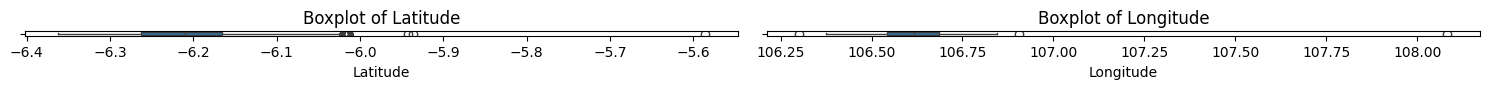

Tabel daftar outlier


,Kolom,Jumlah outlier lower limit,Jumlah outlier upper limit,Total outlier,Outlier lower limit adalah value (<=),Outlier upper limit adalah value (>=)
0,Latitude,0,84,0.22%,None,-6.01958
1,Longitude,1,2,0.01%,106.302,106.90500


In [11]:
kolom=['Latitude','Longitude']
# pengecekan outlier
result=[]

for i in kolom:
    Q1= df[i].quantile(0.25)
    Q3= df[i].quantile(0.75)
    IQR = Q3-Q1

    outlier_lower_limit=Q1-1.5*IQR
    outlier_upper_limit=Q3+1.5*IQR

    lower_limit_outliers = df[df[i]< outlier_lower_limit].sort_values(i)
    upper_limit_outliers = df[df[i]> outlier_upper_limit].sort_values(i)
    total_outliers=len(lower_limit_outliers)+len(upper_limit_outliers)
    total_data=len(df)
    if total_outliers>0:
        result.append({
        'Kolom' : i,
        'Jumlah outlier lower limit': len(lower_limit_outliers),
        'Jumlah outlier upper limit': len(upper_limit_outliers),
        'Total outlier': f'{(total_outliers/total_data) * 100:.2f}%',
        'Outlier lower limit adalah value (<=)': lower_limit_outliers[i].max() if len(lower_limit_outliers)>0 else 'None',
        'Outlier upper limit adalah value (>=)': upper_limit_outliers[i].min() if len(upper_limit_outliers)>0 else 'None'})

num_col=2
num_row=(len(kolom)+1)//num_col

fig,axes=plt.subplots(nrows=num_row,ncols=num_col, figsize=(15,num_row))
axes=axes.flatten()
for i, kol in enumerate(kolom):
    sns.boxplot(x=df[kol],ax=axes[i])
    axes[i].set_title(f'Boxplot of {kol}')
    axes[i].set_xlabel(kol)
for j in range(len(kolom),len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()
print('Tabel daftar outlier')
outlier_=pd.DataFrame(result)
outlier_

`Hapus Outlier`

In [12]:
# latitude_lower_limit = float(outlier_[outlier_['Kolom'] == 'Latitude']['Outlier lower limit adalah value (<=)'].values[0])
latitude_upper_limit = float(outlier_[outlier_['Kolom'] == 'Latitude']['Outlier upper limit adalah value (>=)'].values[0])
longitude_lower_limit = float(outlier_[outlier_['Kolom'] == 'Longitude']['Outlier lower limit adalah value (<=)'].values[0])
longitude_upper_limit = float(outlier_[outlier_['Kolom'] == 'Longitude']['Outlier upper limit adalah value (>=)'].values[0])

# print(f'Latitude lower limit: {latitude_lower_limit}')
print(f'Latitude upper limit: {latitude_upper_limit}')
print(f'Longitude lower limit: {longitude_lower_limit}')
print(f'Longitude upper limit: {longitude_upper_limit}')

# Menghapus outlier dari DataFrame
df = df[
    (df['Latitude'] < latitude_upper_limit) &
    (df['Longitude'] > longitude_lower_limit) & (df['Longitude'] < longitude_upper_limit)
]
df = df[(df['Latitude'] < -6.02051)]
# Menampilkan DataFrame setelah penghapusan
print('DataFrame setelah menghapus outlier:')
df

Latitude upper limit: -6.01958
Longitude lower limit: 106.302
Longitude upper limit: 106.905
DataFrame setelah menghapus outlier:


,Salesman,Day,Pattern,ID Outlet,Channel,Latitude,Longitude
0,1,Fri,Even,601684654,Retail,-6.03832,106.629
1,1,Fri,Even,601685369,Retail,-6.03169,106.667
2,1,Fri,Even,601685370,Retail,-6.02247,106.670
3,1,Fri,Even,601685519,Retail,-6.03414,106.634
4,1,Fri,Even,601685520,Retail,-6.03408,106.633
...,...,...,...,...,...,...,...
40893,84,Wed,Odd,602455642,Retail,-6.35610,106.763
40894,84,Wed,Odd,602751417,Retail,-6.35543,106.765
40895,84,Wed,Odd,602769095,Retail,-6.35637,106.749
40896,84,Wed,Odd,602769096,Retail,-6.35642,106.749


In [13]:
df[df['Channel']=='Grosir']['ID Outlet'].nunique()
# Grosir ada 253 Outlet

253

In [14]:
df[df['Channel']=='Retail']['ID Outlet'].nunique()
# Retail ada 38296 Outlet

38296

In [15]:
# # Plot Scatter letak outlet berdasarkan lat dan long
# plt.figure(figsize=(10, 6))
# plt.scatter(df['Longitude'], df['Latitude'], c='blue', label='Data Points')

# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('Geographical')
# plt.legend()
# plt.grid(True)
# plt.show()

In [24]:
from geopy.distance import geodesic
data_kota = {
    'Kota': [
        'Kota Tangerang', 'Kabupaten Tangerang', 'Tangerang Selatan'
    ],
    'Latitude': [
        -6.1780, -6.2431, -6.3004
    ],
    'Longitude': [
        106.6304, 106.6300, 106.7024
    ]
}

df_kota = pd.DataFrame(data_kota)

df_kota

,Kota,Latitude,Longitude
0,Kota Tangerang,-6.1780,106.6304
1,Kabupaten Tangerang,-6.2431,106.6300
2,Tangerang Selatan,-6.3004,106.7024


In [25]:
# kota terdekat
def find_nearest_kota(lat, lon, df_kota):
    min_distance=float('inf')
    nearest_kota=None
    for _, row in df_kota.iterrows():
        ref_point=(row['Latitude'], row['Longitude'])
        dist=geodesic((lat, lon), ref_point).kilometers
        if dist < min_distance:
            min_distance = dist
            nearest_kota = row['Kota']  # Pastikan nama kolom 'Kota'
    return nearest_kota

df['Kota']=df.apply(lambda row: find_nearest_kota(row['Latitude'], row['Longitude'], df_kota), axis=1)


In [26]:
df['Kota'].value_counts()

Kota
Kota Tangerang         19339
Kabupaten Tangerang    10248
Tangerang Selatan       9212
Name: count, dtype: int64

In [ ]:
df['Kota'].value_counts()

Kota
Kabupaten Tangerang    21960
Kota Tangerang         16837
Tangerang Selatan          2
Name: count, dtype: int64

In [30]:
df[df['ID Outlet']==601342298]
df[df['ID Outlet']==601287740]

,Salesman,Day,Pattern,ID Outlet,Channel,Latitude,Longitude,Kota


In [29]:

df=df.drop(df[df['ID Outlet']==601287740].index)
df=df.drop(df[df['ID Outlet']==601342298].index)


In [31]:
df

,Salesman,Day,Pattern,ID Outlet,Channel,Latitude,Longitude,Kota
0,1,Fri,Even,601684654,Retail,-6.03832,106.629,Kota Tangerang
1,1,Fri,Even,601685369,Retail,-6.03169,106.667,Kota Tangerang
2,1,Fri,Even,601685370,Retail,-6.02247,106.670,Kota Tangerang
3,1,Fri,Even,601685519,Retail,-6.03414,106.634,Kota Tangerang
4,1,Fri,Even,601685520,Retail,-6.03408,106.633,Kota Tangerang
...,...,...,...,...,...,...,...,...
40893,84,Wed,Odd,602455642,Retail,-6.35610,106.763,Tangerang Selatan
40894,84,Wed,Odd,602751417,Retail,-6.35543,106.765,Tangerang Selatan
40895,84,Wed,Odd,602769095,Retail,-6.35637,106.749,Tangerang Selatan
40896,84,Wed,Odd,602769096,Retail,-6.35642,106.749,Tangerang Selatan


In [32]:
df.to_excel('Cluster_KOTA_results.xlsx', index=False)